In [1]:
#Python 2 !!!
#nie wszystko można odpalić w domyślnym 3.6.0 na kaggle
#najlepiej ściągnąć notebooka i zmienić kernel w jupyterze

#importuje biblioteki

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import  mean_squared_error, roc_auc_score,accuracy_score
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier

from pylab import rcParams

rcParams['figure.figsize'] = 10, 10
color = sns.color_palette()

In [2]:
#EKSPLORACJA DANYCH

#wgrywam dane

train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")

id_test = test_df.id

#sprawdzam ile rekordow i atrybutow
print('train_df shape:',train_df.shape)
print('test_df shape:',test_df.shape)

IOError: File ../input/train.csv does not exist

In [3]:
#EKSPLORACJA DANYCH

#wgrywam dane

train_df = pd.read_csv("input/train.csv")
test_df = pd.read_csv("input/test.csv")

id_test = test_df.id

#sprawdzam ile rekordow i atrybutow
print('train_df shape:',train_df.shape)
print('test_df shape:',test_df.shape)

('train_df shape:', (30471, 292))
('test_df shape:', (7662, 291))


In [4]:
#jakie mam typy danych

dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
print('Variables data type:')
dtype_df.groupby("Column Type").aggregate('count').reset_index()

Variables data type:


,Column Type,Count
0,int64,157
1,float64,119
2,object,16


In [5]:
#POCZĄTKOWE DANE

#statystyka

train_df.describe().round(1)

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.0,30471.0,24088.0,30304.0,20899.0,20899.0,16866.0,20899.0,20899.0,16912.0,...,30471.0,30471.0,30471.0,30471.0,30471.0,30471.0,30471.0,30471.0,30471.0,30471.0
mean,15237.9,54.2,34.4,7.7,12.6,1.8,3068.1,1.9,6.4,2.1,...,32.1,10.8,1.8,15.0,30.3,0.4,8.6,52.8,6.0,7123035.3
std,8796.5,38.0,52.3,5.3,6.8,1.5,154387.8,0.9,28.3,0.9,...,73.5,28.4,5.4,29.1,47.3,0.6,20.6,46.3,4.9,4780111.3
min,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000.0
25%,7620.5,38.0,20.0,3.0,9.0,1.0,1967.0,1.0,1.0,1.0,...,2.0,1.0,0.0,2.0,9.0,0.0,0.0,11.0,1.0,4740002.0
50%,15238.0,49.0,30.0,6.5,12.0,1.0,1979.0,2.0,6.0,2.0,...,8.0,2.0,0.0,7.0,16.0,0.0,2.0,48.0,5.0,6274411.0
75%,22855.5,63.0,43.0,11.0,17.0,2.0,2005.0,2.0,9.0,3.0,...,21.0,5.0,1.0,12.0,28.0,1.0,7.0,76.0,10.0,8300000.0
max,30473.0,5326.0,7478.0,77.0,117.0,6.0,20052009.0,19.0,2014.0,33.0,...,377.0,147.0,30.0,151.0,250.0,2.0,106.0,218.0,21.0,111111112.0


In [6]:
#uzupelnianie

print(train_df.loc[train_df['build_year'] == 20052009].id)
print(train_df.loc[train_df['state'] == 33].id)
print('build_year:',train_df.ix[10090].build_year)
print('state:',train_df.ix[10090].state)

train_df.loc[train_df['id'] == 10092, 'build_year'] = 2007
train_df.loc[train_df['id'] == 10092, 'state'] = 3
train_df.loc[train_df['id'] == 10093, 'build_year'] = 2009

10089    10092
Name: id, dtype: int64
10089    10092
Name: id, dtype: int64
('build_year:', nan)
('state:', 1.0)


In [7]:
train_df.describe().round(1)

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.0,30471.0,24088.0,30304.0,20899.0,20899.0,16867.0,20899.0,20899.0,16912.0,...,30471.0,30471.0,30471.0,30471.0,30471.0,30471.0,30471.0,30471.0,30471.0,30471.0
mean,15237.9,54.2,34.4,7.7,12.6,1.8,1879.3,1.9,6.4,2.1,...,32.1,10.8,1.8,15.0,30.3,0.4,8.6,52.8,6.0,7123035.3
std,8796.5,38.0,52.3,5.3,6.8,1.5,447.8,0.9,28.3,0.8,...,73.5,28.4,5.4,29.1,47.3,0.6,20.6,46.3,4.9,4780111.3
min,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000.0
25%,7620.5,38.0,20.0,3.0,9.0,1.0,1967.0,1.0,1.0,1.0,...,2.0,1.0,0.0,2.0,9.0,0.0,0.0,11.0,1.0,4740002.0
50%,15238.0,49.0,30.0,6.5,12.0,1.0,1979.0,2.0,6.0,2.0,...,8.0,2.0,0.0,7.0,16.0,0.0,2.0,48.0,5.0,6274411.0
75%,22855.5,63.0,43.0,11.0,17.0,2.0,2005.0,2.0,9.0,3.0,...,21.0,5.0,1.0,12.0,28.0,1.0,7.0,76.0,10.0,8300000.0
max,30473.0,5326.0,7478.0,77.0,117.0,6.0,4965.0,19.0,2014.0,4.0,...,377.0,147.0,30.0,151.0,250.0,2.0,106.0,218.0,21.0,111111112.0


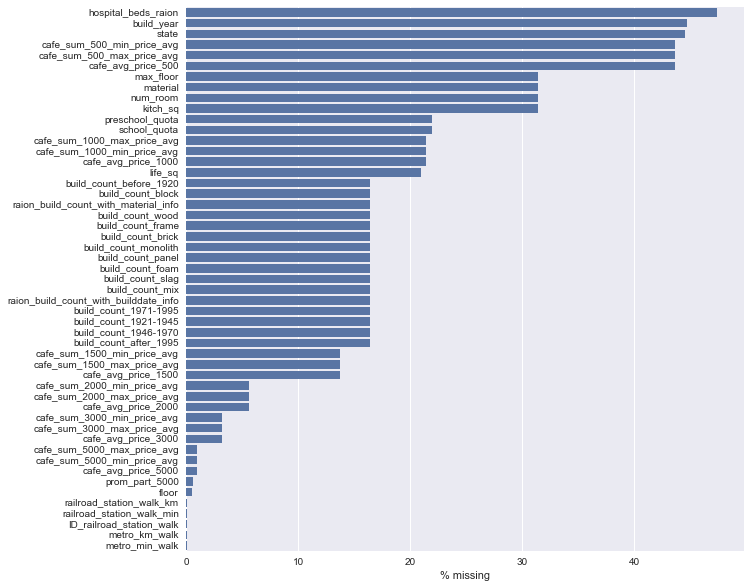

In [8]:
train_na = (train_df.isnull().sum() / len(train_df)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
sns.barplot(y=train_na.index, x=train_na,color=color[0])
plt.xlabel('% missing')

In [9]:

for f in train_df.columns:
    if train_df[f].dtype=='object':
        lbl = LabelEncoder()
        lbl.fit(list(train_df[f].values)) 
        train_df[f] = lbl.transform(list(train_df[f].values))
        
for c in test_df.columns:
    if test_df[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(test_df[c].values)) 
        test_df[c] = lbl.transform(list(test_df[c].values))

In [10]:

kitch_ratio = train_df['full_sq']/train_df['kitch_sq']
train_df['kitch_sq']=train_df['kitch_sq'].fillna(train_df['full_sq'] /kitch_ratio.median())
test_df['kitch_sq']=test_df['kitch_sq'].fillna(test_df['full_sq'] /kitch_ratio.median())

lifesq_ratio = train_df['full_sq']/train_df['life_sq']
train_df['life_sq']=train_df['life_sq'].fillna(train_df['full_sq'] /lifesq_ratio.median())
test_df['life_sq']=test_df['life_sq'].fillna(test_df['full_sq'] /lifesq_ratio.median())

train_df=train_df.fillna(train_df.median(),inplace=True)
test_df=test_df.fillna(test_df.median(),inplace=True)


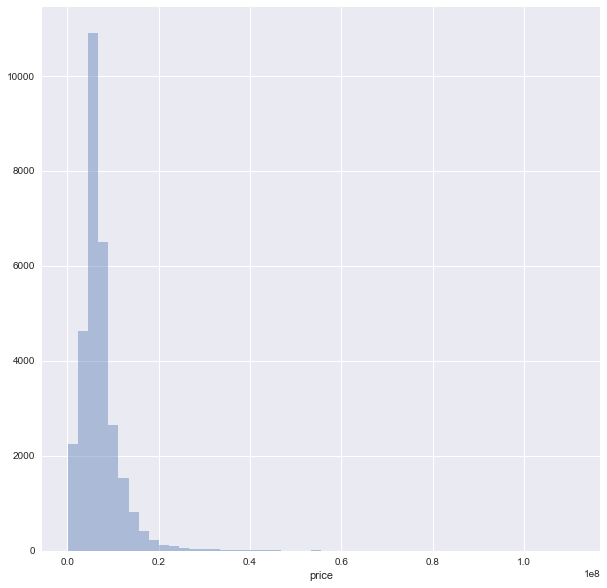

In [11]:
sns.distplot(train_df.price_doc.values, kde=None)
plt.xlabel('price')

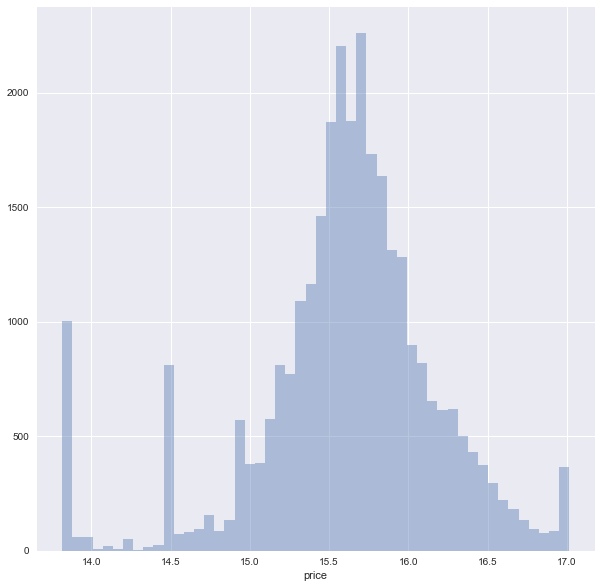

In [12]:
ulimit = np.percentile(train_df.price_doc.values, 99)
llimit = np.percentile(train_df.price_doc.values, 1)
train_df.loc[train_df['price_doc'] >ulimit, 'price_doc'] = ulimit
train_df.loc[train_df['price_doc'] <llimit, 'price_doc'] = llimit

sns.distplot(np.log(train_df.price_doc.values),  bins=50,kde=None)
plt.xlabel('price')

train_df['price_doc_log'] = np.log1p(train_df['price_doc'])

In [13]:
print(train_df['price_doc'].value_counts().head(10))

train_df['label_value'] = 0
train_df.loc[train_df['price_doc'] == 1000000, 'label_value'] = 1
train_df.loc[train_df['price_doc'] == 2000000, 'label_value'] = 2

1000000.0     980
2000000.0     757
6000000.0     372
3000000.0     332
6500000.0     330
7000000.0     319
5500000.0     309
24532075.4    305
6300000.0     295
5000000.0     294
Name: price_doc, dtype: int64


In [14]:
data_X = train_df.drop(["id","timestamp","price_doc","price_doc_log",'label_value'],axis=1)
data_y = train_df['price_doc_log']

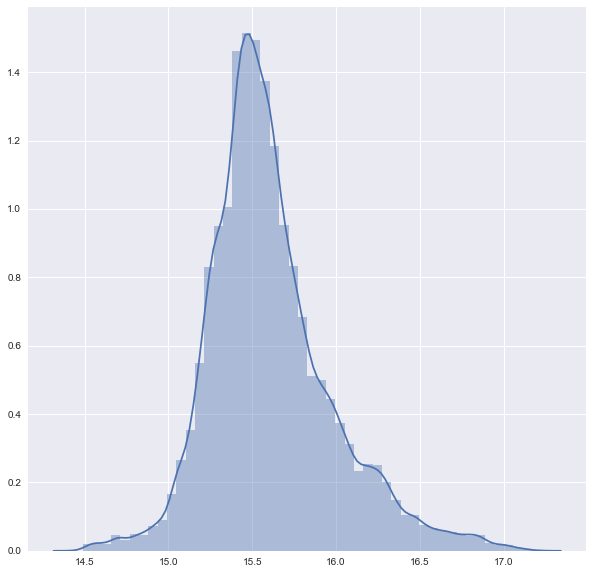

In [15]:
GBmodel = GradientBoostingRegressor(min_samples_leaf= 4, learning_rate= 0.1, max_depth= 4)
GBmodel.fit(data_X,data_y)

sns.distplot(GBmodel.predict(data_X))

In [16]:
clfdata_X = train_df.drop(['id','timestamp','label_value','price_doc_log','price_doc'],axis=1)
clfdata_y = train_df['label_value']

clfX_train, clfX_test, clfY_train, clfY_test = train_test_split(clfdata_X, clfdata_y, test_size=0.30,random_state=21)

GBclf= GradientBoostingClassifier(max_depth=4,min_samples_leaf=2)

In [17]:
GBclf.fit(clfX_train,clfY_train)
GBclf.score(clfX_test,clfY_test)

0.94071319186173707

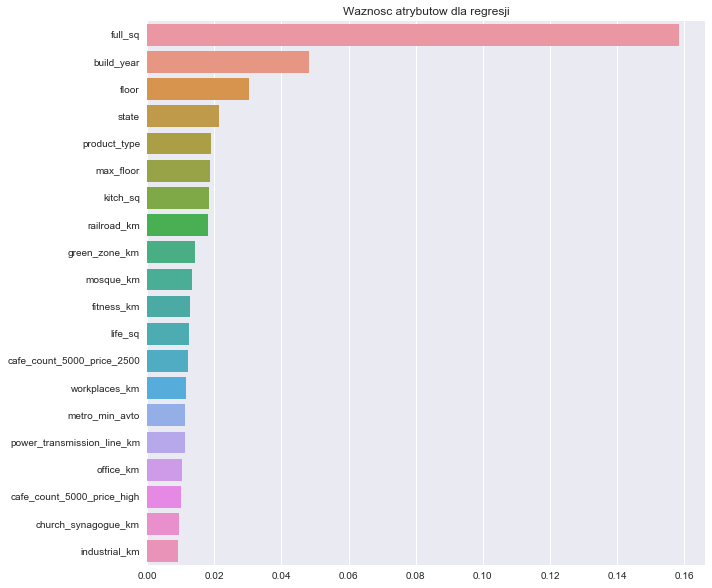

In [18]:
importances = GBmodel.feature_importances_
importances_by_trees=[tree[0].feature_importances_ for tree in GBmodel.estimators_]
std = np.std(importances_by_trees,axis=0)
indices = np.argsort(importances)[::-1]


sns.barplot(importances[indices][:20],data_X.columns[indices[:20]].values)
plt.title("Waznosc atrybutow dla regresji")

In [19]:
clfdata_X = train_df.drop(['id','timestamp','label_value','price_doc_log','price_doc'],axis=1)
clfdata_y = train_df['label_value']

clfX_train, clfX_test, clfY_train, clfY_test = train_test_split(clfdata_X, clfdata_y, test_size=0.25,random_state=191)

GBclf= GradientBoostingClassifier(max_depth=5,min_samples_leaf=1)

In [20]:
GBclf.fit(clfX_train,clfY_train)
GBclf.score(clfX_test,clfY_test)

0.9400105014439486

In [21]:
predict = GBmodel.predict(test_df.drop(["id", "timestamp"],axis=1))
lab = GBclf.predict(test_df.drop(['id','timestamp'],axis=1))
output = pd.DataFrame({'id': id_test, 'price_doc': np.expm1(predict)})
output['label'] = lab

output.loc[output['label'] == 1, 'price_doc'] = 1000000
output.loc[output['label'] == 2, 'price_doc'] = 2000000
output = output.drop(['label'],axis=1)

In [22]:
output.to_csv('sub.csv', index=False)
